<a href="https://colab.research.google.com/github/Kavya-sree/Git-tutorial/blob/main/Titanic_Survival_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. It sank in the north Atlantic ocean on April 15, 1912 during her maiden voyage after colliding with an iceberg and killing 1502 out of 2224 passengers and crew.

**Objective**

The goal is to create a Model to predict which passengers survived the shipwreck.  

# 1. Importing Libraries

In [154]:
%matplotlib inline

# Data Processing and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Start Python Imports
import math, time, random, datetime

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set(style = 'white' , context = 'notebook', palette = 'deep')

#For ignoring warning
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

# 2. Load Datasets

In [155]:
from google.colab import files
files=files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [156]:
# load the datasets using pandas's read_csv method
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

PassengerId = test['PassengerId']

# combine train and teat datasets to run certain operations on both datasets together.
combine =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

# 3. Data Overiew

**3.1 Data preview**

In [157]:
# View the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [159]:
print("train dataset:")
print(train.shape)   #shows datapoints and features in train dataset                   
print(train.columns) #displays column names in our train dataset
print("test dataset:")
print(test.shape)   #shows datapoints and features in test dataset                    
print(test.columns) #displays column names in our test dataset

train dataset:
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
test dataset:
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [160]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [161]:
combine.shape

(1309, 12)

**3.2 Data Descriptions**

Survival (dependent variable): 0 = No, 1 = Yes

pclass (Ticket class): 1 = upper class, 2 = middle class, and 3 = lower class

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

**Categorical features:**

Categorical: Survived, Sex, and Embarked.

Ordinal: Pclass, cabin


**Numerical features:** 

Continous: Age, Fare 

Discrete: SibSp, Parch




In [162]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Danbom, Mr. Ernst Gilbert",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**3.3 Missing values**

Rows which are missing a value or have NaN.

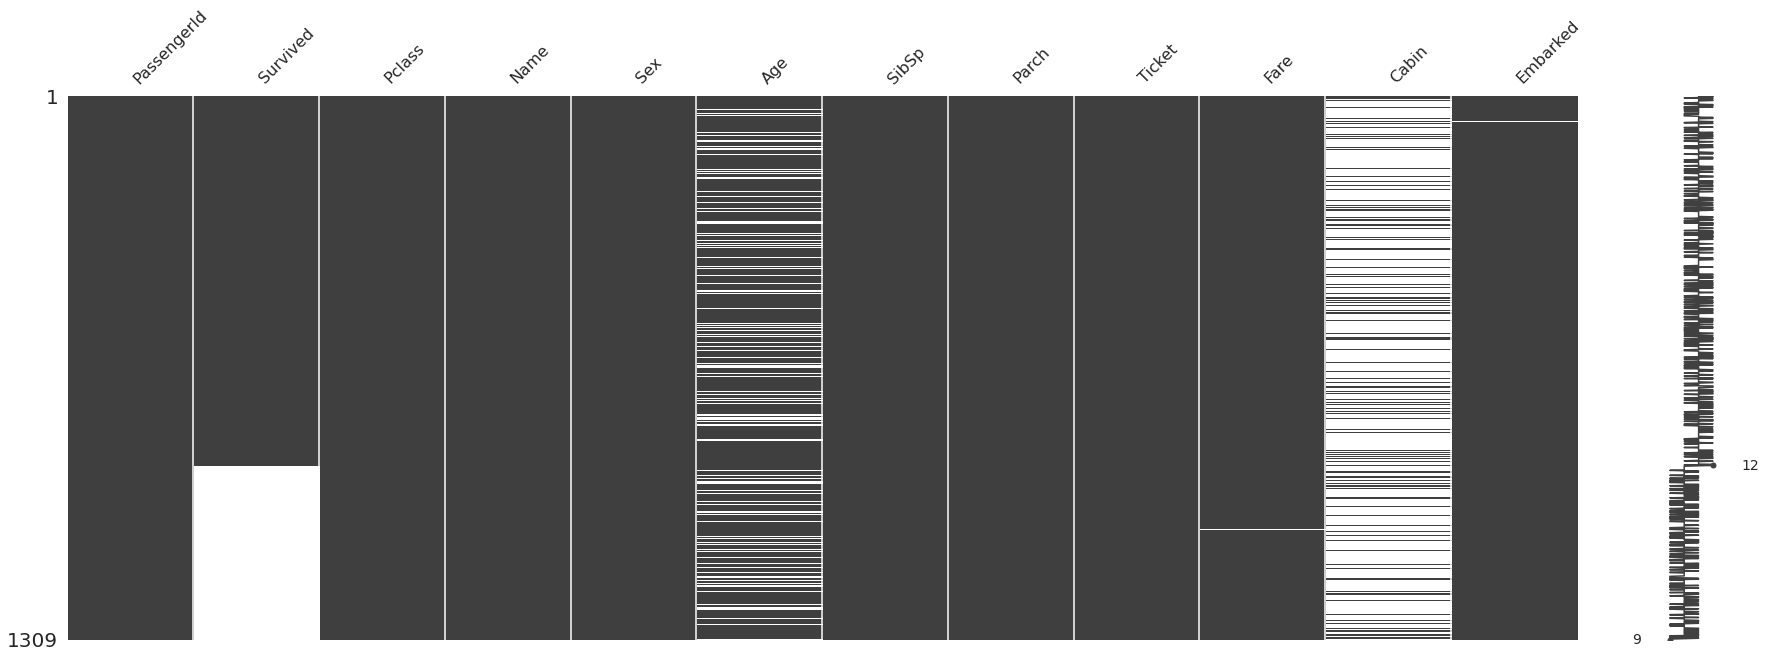

In [163]:
# Plot graphic of missing values
missingno.matrix(combine, figsize = (30,10))

In [164]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 3 features that contain null values:

Age: 177 missing values out of 891

Cabin: 687 missing values out of 891. It constitute a significant amount of data. Imputation may likely cause bias.

Embarked: Only 2 missing values. Any simple imputation is sufficient. 

In [165]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 4. EDA- Exploratory Data Analysis

**4.1 Target Feature: Survived**

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others.

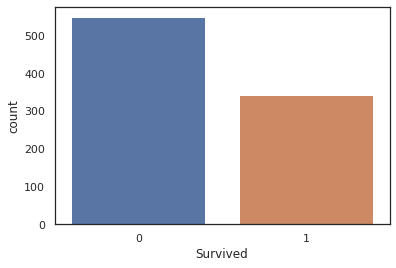

In [166]:
sns.countplot(x='Survived', data=train);

More people died than survived.

**4.2 Numerical Features**

The numerical features in our dataset are SibSp, Parch, Age, Fare.
We use heatmap to find correlated features. Only numeric features are compared as correlation between strings is not possible.


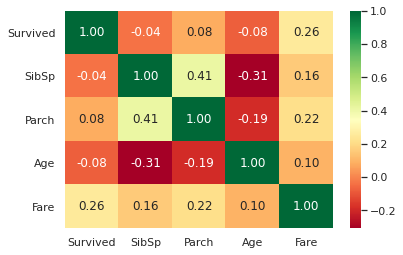

In [167]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "RdYlGn")



*   The feature "Fare" has  significant correlation with Survival
*   There is a high correlation between SibSp and Parch

We can explore all these features

**4.2.1 Age**

Age is a continuous feature

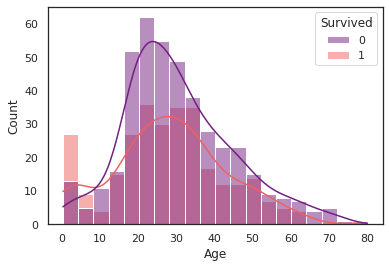

In [168]:
# Age vs Survived
sns.histplot(data=train, x='Age', hue='Survived',fill=True, legend=True, kde=True, palette="magma");
plt.show()



*   Babies(Age <=5) had high survival rate
*   Most passengers are in 15-35 age range

**4.2.2 Fare**

Fare is a continous feature. 

We can use pandas.qcut. (Quantile-based discretization function). Discretize variable into equal-sized buckets based on rank or based on sample quantiles. 

In [169]:
train['Fare_Range'] = pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


We can clearly see that as Fare_Range increases, the Survival chance also increases.

**4.2.3 SibSp**

SibSp- number of siblings/spouse 

In [170]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


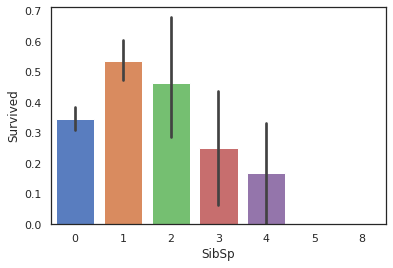

In [171]:
sns.barplot(x="SibSp",y="Survived",data=train, palette = "muted")

We can see that People with small number of siblings/spouse had more survival rate.
Passengers having more Siblings/Spouse has low chance of survival.

**4.2.4 Parch**

Parch- number of parents/children 

In [172]:
pd.crosstab([train.Parch],train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


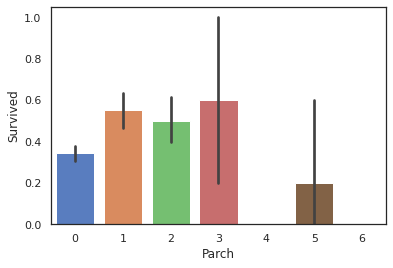

In [173]:
sns.barplot(x="Parch",y="Survived",data=train, palette = "muted")

We can see that People with small number of parents/children had more survival rate. 

**4.3 Categorical Features**

We have Sex, Pclass and Embarked as categorical features

**4.3.1 Pclass**

In [174]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


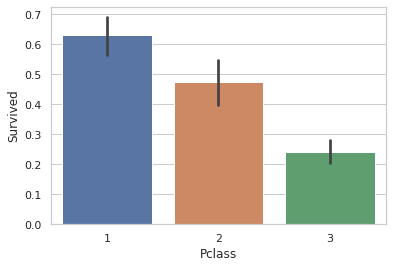

In [175]:
# Visualise survival of each passenger class
sns.set_style('whitegrid')
sns.barplot(x='Pclass' , y='Survived' , data=train)
plt.show()

*Observation* : We can clearly see that Survival of first class passengers was prioritised, followed by second class, then third. Even though the the number of Passengers in Pclass 3 were a lot higher, the number of people survived is very low. May be Pclass 1 were prioritised during the evacuation due to their influence.

**4.3.2 Sex**

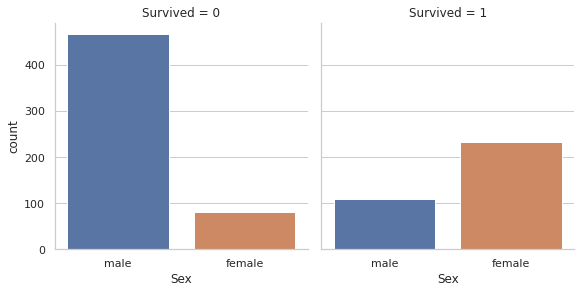

In [176]:
# Visualise survival of each Sex
sns.set_style('whitegrid')
sns.catplot(x='Sex', col='Survived', kind='count', data=train, height=4,);
#sns.countplot(x='Sex' , hue='Survived' , data=train)
plt.show()

In [177]:
# Calculating the value counts for our attributes
male_total = train[train['Sex']=='male'].shape[0]
female_total = train[train['Sex']=='female'].shape[0]
print('Total male in our dataset:', male_total)
print('Total female in our dataset:', female_total)

train[["Sex","Survived"]].groupby('Sex').mean()

Total male in our dataset: 577
Total female in our dataset: 314


,Survived
Sex,
female,0.742038
male,0.188908


*Observation*: The number of men is lot more than the number of women. Still the survival rates for a women on the ship is 74% while that for men in around 19%.

**Sex and Pclass vs Survival**

Lets check survival with Sex and Pclass together using crosstab and catplot

In [178]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

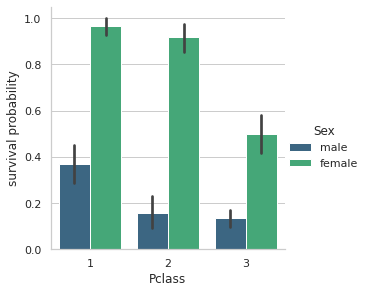

In [179]:
# Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train, height=4, kind="bar", palette="viridis")
g = g.set_ylabels("survival probability")

We can see that irrespective of Pclass, Female were given priority than Male. Even Male from Pclass 1 have low survival rate. 

The lowest survival rate is for Male from Pclass 2 and 3. 

The highest survival rate is for Females from Pclass 1(about 95%). Only 3 out of 94 Females from Pclass 1 died.

Pclass is definetly an important feature.

**4.3.3 Embarked**

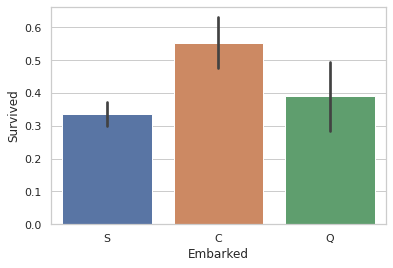

In [180]:
sns.barplot(x='Embarked',y='Survived',data=train)
plt.show()

Passengers boarded from Port c has the highest survival chance, while Port S has lowest.

**Pclass vs Embarked**

In [181]:
pd.crosstab(train.Pclass,train.Embarked,margins=True).style.background_gradient(cmap='summer_r')

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


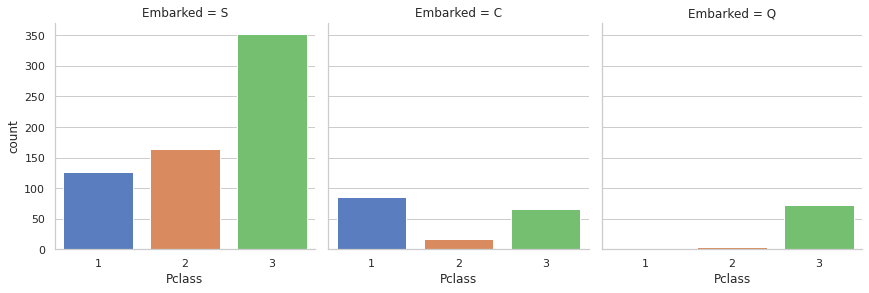

In [182]:
# Pclass vs Embarked 
sns.catplot(x="Pclass", col="Embarked",  data=train, height=4, kind="count", palette="muted")



*   Majority passengers boarded from S and most of them from Pclass 3.
*   Port Q has low number of passengers. Most of the passengers from port Q were from Pclass 3
*   Passengers boarded from Port c are mostly from Pclass 1 which seem to have high survival rate


**4.4 Nominal Feature**

**4.1.1 Name**

Name values are unique. So no correlation is possible using 'Name' feature. But it contains both name and title of the passenger. Let's extract title from this feature. (feature engineering)

People's title influences how they are treated. So it is essential to extract Title.

In [183]:
# create a new feature to extract title names from the Name column
combine['Title'] = combine.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

# count
combine["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Sir               1
Dona              1
Lady              1
the Countess      1
Jonkheer          1
Capt              1
Mme               1
Don               1
Name: Title, dtype: int64

In [184]:
# create a new feature to extract title names from the Name column
test['Title'] = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

# count
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

There 18 titles and most of them are rare. So we can group similar titles.

In [185]:
# map normalized title to Title feature vector
combine["Title"] = combine["Title"].map({
    "Mr" :        "Mr", 
    "Miss" :      "Miss", 
    "Mrs" :       "Mrs", 
    "Master" :    "Master", 
    "Dr":         "Officer", 
    "Rev":        "Officer", 
    "Mlle":       "Miss", 
    "Col":        "Officer", 
    "Major":      "Officer", 
    "Jonkheer":   "Royalty", 
    "Don":        "Royalty",
    "Dona":       "Royalty",
    "Lady":      "Royalty",
    "the Countess":"Royalty", 
    "Mme":        "Mrs", 
    "Capt":       "Officer", 
    "Ms":         "Mrs", 
    "Sir" :       "Officer"
})

# print value counts
print(combine.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     24
Royalty      5
Name: Title, dtype: int64


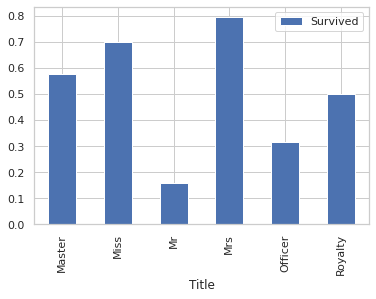

In [186]:
pivot = pd.pivot_table(combine, index=['Title'], values=['Survived'], aggfunc=np.mean)
pivot.plot(kind="bar")

Title shows an uneven distribution of survival rates across the different titles. Females, children and royalty appear to have the highest chance of survival. This suggests there is some correlation between Title and Survived.

We no longer want Name feature, since Title is extracted from it. We can drop "Name"

In [187]:
combine = combine.drop(columns=['Name'])

# 5. Data Cleaning

We need to identify errors and missing datas in the dataset that may negatively impact a predictive model. Then clean and impute datas.

**5.1 Age**

In [188]:
# print null value count
print("Null values:", combine['Age'].isnull().sum())

# calculate zscore for each value
zscore = (combine.Age - combine.Age.mean()) / combine.Age.std()

# calculate outliers using zscore
outliers = combine.loc[abs(zscore) > 3]

# print outliers
print("Outliers:", len(outliers))

Null values: 263
Outliers: 3


First we need to impute the missing values.

**5.1.1 Impute Missing Age Values**

Before estimating the missing values, we must first find correlated features of age to use as the basis of our imputation.

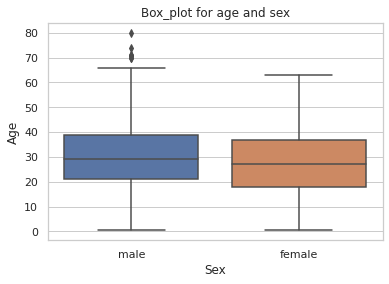

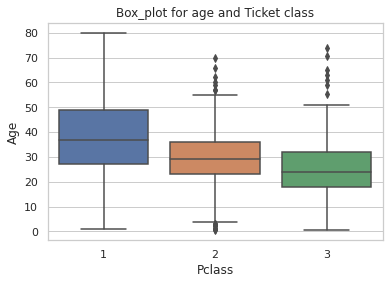

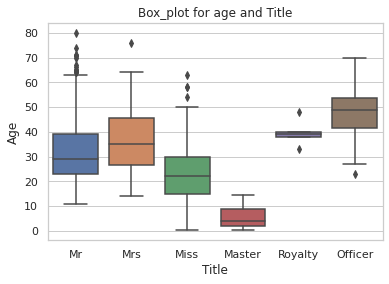

In [189]:
#visualise using boxplot
sns.boxplot(x='Sex',y='Age', data=train)
plt.title("Box_plot for age and sex")
plt.show()

sns.boxplot(x='Pclass',y='Age', data=train)
plt.title("Box_plot for age and Ticket class")
plt.show()

sns.boxplot(x='Title',y='Age', data=combine)
plt.title("Box_plot for age and Title")
plt.show()

*   The age distribution seems almost same in male and female population. Thus 'Sex' feature is not informative.
*   The Pclass distribution seems pretty informative. There are more young people from class 3. Class 1 passengers are older than class 2 passengers. Class 2 passengers are older than class 3 passengers. We can easily visualize that roughly 37, 29, 24 respectively are the median values of each classes.
*   The Title distribution gives more information about the age of passengers. Like the median age of those having title 'Master' is roughly 5.

We will impute our missing ages using Linear Regression imputation.

In [190]:
# we first need to map Title to numerical values to allow the algorithm to run
combine['TitleMap'] = combine['Title'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Royalty':4, 'Officer':5})

# getting all data with known age values to train our model
data = combine.loc[combine['Age'].notna()]

# creating X = features (Title and Class) and Y = response variable (Age)
X = data[['TitleMap' , 'Pclass']]
Y = data['Age']

# imputing age using regression imputation
regression_classifier = LinearRegression()

# splitting our data for training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=263)

model = regression_classifier.fit(X_train,Y_train) # data fitted to model to train

# predict missing ages
age_result = model.predict(X_test)

# age_result contains the imputed values and can be imputed by:
combine.loc[combine['Age'].isnull(), 'Age'] = age_result

# check all age values have been filled
print("Null values:", combine['Age'].isnull().sum())

Null values: 0


In [191]:
# drop Title as it is no longer required
combine = combine.drop(columns="Title")

**5.1.2 Validate Age outliers**

Identify and validte outliers in Age data

In [192]:
# calculate zscore for each value
zscore = (combine.Age - combine.Age.mean()) / combine.Age.std()

# calculate outliers using zscore
outliers = combine[abs(zscore) > 3]

# print outliers
print("Outlier count:", len(outliers))
print("Outliers:") 
outliers

Outlier count: 8
Outliers:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleMap
96,97,0.0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,0
116,117,0.0,3,male,70.5,0,0,370369,7.7500,NaN,Q,0
493,494,0.0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C,0
630,631,1.0,1,male,80.0,0,0,27042,30.0000,A23,S,0
672,673,0.0,2,male,70.0,0,0,C.A. 24580,10.5000,NaN,S,0
745,746,0.0,1,male,70.0,1,1,WE/P 5735,71.0000,B22,S,5
851,852,0.0,3,male,74.0,0,0,347060,7.7750,NaN,S,0
987,988,NaN,1,female,76.0,1,0,19877,78.8500,C46,S,1


There are only 7 outliers for age.
All outliers are valid ages for a passenger. They can be retained in the dataset.

**5.2 Fare**

In [193]:
# print null value count
print("Null values:", combine.Fare.isnull().sum())

zscore = (combine.Fare - combine.Fare.mean()) / combine.Fare.std()

# calculate outliers using zscore
outliers = combine.loc[abs(zscore) > 3]

# print outlier count
print("Outlier count:", len(outliers))

print("Outliers:")
outliers

Null values: 1
Outlier count: 38
Outliers:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleMap
27,28,0.0,1,male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,0
88,89,1.0,1,female,23.000000,3,2,19950,263.0000,C23 C25 C27,S,2
118,119,0.0,1,male,24.000000,0,1,PC 17558,247.5208,B58 B60,C,0
258,259,1.0,1,female,35.000000,0,0,PC 17755,512.3292,NaN,C,2
299,300,1.0,1,female,50.000000,0,1,PC 17558,247.5208,B58 B60,C,1
311,312,1.0,1,female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,2
341,342,1.0,1,female,24.000000,3,2,19950,263.0000,C23 C25 C27,S,2
377,378,0.0,1,male,27.000000,0,2,113503,211.5000,C82,C,0
380,381,1.0,1,female,42.000000,0,0,PC 17757,227.5250,NaN,C,2
438,439,0.0,1,male,64.000000,1,4,19950,263.0000,C23 C25 C27,S,0


There are multiple instances of the most extreme outliers. All outliers are also from first class, which would expect to have higher ticket costs. These values may not be  erronous and will be retained in the dataset.

In [194]:
#Fill the one missing value of Fare with the median value
combine["Fare"] = combine["Fare"].fillna(combine["Fare"].median())

**5.3 Cabin**

In [195]:
# print null value count
print("Null values:", combine.Cabin.isnull().sum())

# print list of unique values to check for anything unusual
print("Unique count:", combine.Cabin.nunique())

Null values: 1014
Unique count: 186


Cabin is missing a huge amount of data. Imputation is futile. We can drop this feature from dataset.

In [196]:
combine = combine.drop(columns='Cabin')

**5.4  Embarked**

In [197]:
# print null value count
print("Null values:", combine.Embarked.isnull().sum())

# print list of unique values to check for anything unusual
print("Unique values:", combine.Embarked.dropna().unique())

Null values: 2
Unique values: ['S' 'C' 'Q']


Embarked contains 2 missing values and no unusual values.

**5.4.1 Impute Missing Embarked Values**

As only 2 of 891 values are missing, we can simply fill these with the most common embarked value.

In [198]:
# print embarked value counts
print(combine.Embarked.value_counts())

S    914
C    270
Q    123
Name: Embarked, dtype: int64


Most common value is 'S'. Fill missing embarked values with 'S'.

In [199]:
# fill emabrked na with 'S'
combine.Embarked = combine.Embarked.fillna('S')

# confirm there are no more nulls
print("Null values:", combine.Embarked.isnull().sum())
print(combine.Embarked.value_counts())

Null values: 0
S    916
C    270
Q    123
Name: Embarked, dtype: int64


**5.5 Ticket**


In [200]:
# print null value count
print("Null values:", combine.Ticket.isnull().sum())

# print list of unique values to check for anything unusual
print("Unique values:", combine.Ticket.nunique())

Null values: 0
Unique values: 929


Since there are 929 random unique Tickets, they have no impact on outcome. So we can drop Ticket column.

In [201]:
combine = combine.drop(columns=['Ticket'])

We can also drop PassengerId as it is useless

In [202]:
combine.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [203]:
combine.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TitleMap
0,0.0,3,male,22.0,1,0,7.2500,S,0
1,1.0,1,female,38.0,1,0,71.2833,C,1
2,1.0,3,female,26.0,0,0,7.9250,S,2
3,1.0,1,female,35.0,1,0,53.1000,S,1
4,0.0,3,male,35.0,0,0,8.0500,S,0


# 6. Feature Engineering

**6.1 Sex**

We cannot pass strings to a machine learning model, so we need to convert features 'Sex' into numeric values.


In [204]:
combine['Sex'].replace(['male','female'],[0,1],inplace=True)

**6.2 Age**

Since Age is a continous feature, we can create clusters or bins.

 we cannot directly pass to Machine Learning Models. We already created bins, but assigned string values (for easy interpretation and EDA). We can assign numeric values to those string values.

In [205]:
#creating the bins that we need to cut each range of ages
bins = (0, 5, 12, 18, 35, 60, 120) 

#Seting the names that we want use to the categories
categories = ['babies', 'Children', 'Teen', 'YoungAdult', 'Adult', 'Senior']

#Applying the pd.cut and using the parameters that we created 
combine["AgeGroup"] = pd.cut(combine.Age, bins, labels=categories)

In [206]:
combine['AgeGroup'].replace(['babies','Children','Teen','YoungAdult','Adult','Senior'],[0,1,2,3,4,5],inplace=True)

We dont need Age feature. So we drop Age


In [207]:
combine = combine.drop(columns='Age')

**6.3 Relatives and Alone**

Both SibSp and Parch can be combined as they represent the number of relatives on board. We can create '**Relatives**' feature which is sum of SibSp and Parch.

In [208]:
# create a new feature to calculate number of relatives
combine['Relatives'] = combine['SibSp'] + combine['Parch']

# print value counts
print(combine.Relatives.value_counts())

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Relatives, dtype: int64


790 passengers were travelling alone. Let us represent this as a separate feature '**Alone**'.

In [209]:
# create new feature to show if passenger was alone or with family
combine['Alone'] = 0
combine.loc[combine['Relatives'] == 0, 'Alone'] = 1

# print value counts
print(combine.Alone.value_counts())

1    790
0    519
Name: Alone, dtype: int64


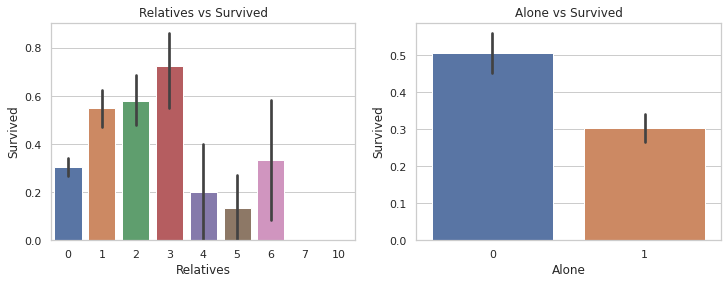

In [210]:
f,ax=plt.subplots(1,2,figsize=(12,4))

sns.barplot(data=combine, x="Relatives", y="Survived", ax=ax[0])
ax[0].set_title('Relatives vs Survived')

sns.barplot(x='Alone', y='Survived', data=combine, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.show()

Relatives=0 means that the passenger is alone. 
If you are alone or Relatives=0,then chances for survival is very low.

For Relatives > 3, the chance of survival decrease. 

In [211]:
combine = combine.drop(columns=['SibSp','Parch'])

**6.4 Fare**

Since Fare cannot be passed as it is, we can convert Fare it into categorical.

In [212]:
combine['Fare_Cat']=0
combine.loc[combine['Fare']<=7.91,'Fare_Cat']=0
combine.loc[(combine['Fare']>7.91) & (combine['Fare']<=14.454),'Fare_Cat']=1
combine.loc[(combine['Fare']>14.454) & (combine['Fare']<=31),'Fare_Cat']=2
combine.loc[(combine['Fare']>31) & (combine['Fare']<=513),'Fare_Cat']=3

Since we have Fare_Cat, We can Fare as it is not needed.

In [213]:
combine = combine.drop(columns=['Fare'])

**6.6 Embarked**

Since we cannot pass strings to a machine learning model, we need to convert feature Embarked into numeric values.

In [214]:
combine['Embarked'] = combine['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

In [215]:
combine.head()

,Survived,Pclass,Sex,Embarked,TitleMap,AgeGroup,Relatives,Alone,Fare_Cat
0,0.0,3,0,0,0,3,1,0,0
1,1.0,1,1,2,1,4,1,0,3
2,1.0,3,1,0,2,3,0,1,1
3,1.0,1,1,0,1,3,1,0,3
4,0.0,3,0,0,0,3,0,1,1


# 7. Modeling

In [216]:
## Separate train dataset and test dataset

train_len = len(train)
train = combine[:train_len]
test = combine[train_len:]

In [217]:
print(test)

      Survived  Pclass  Sex  Embarked  ...  AgeGroup  Relatives  Alone  Fare_Cat
891        NaN       3    0         1  ...         3          0      1         0
892        NaN       3    1         0  ...         4          1      0         0
893        NaN       2    0         1  ...         5          0      1         1
894        NaN       3    0         0  ...         3          0      1         1
895        NaN       3    1         0  ...         3          2      0         1
...        ...     ...  ...       ...  ...       ...        ...    ...       ...
1304       NaN       3    0         0  ...         3          0      1         1
1305       NaN       1    1         2  ...         4          0      1         3
1306       NaN       3    0         0  ...         4          0      1         0
1307       NaN       3    0         0  ...         2          0      1         1
1308       NaN       3    0         2  ...         3          2      0         2

[418 rows x 9 columns]


In [218]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"].astype(int)
X_test  = test.drop("Survived",axis=1)

In [219]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.82

In [220]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.05

In [221]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.72

In [222]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.79

In [223]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

81.03

In [224]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.11

In [225]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

In [229]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": Y_pred
    })


submission.to_csv('submission.csv', index=False)
